In [162]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# EDA
<code>Key Features</code>
Описания фичей:

- ID: Уникальный идентификатор для каждой записи в наборе данных.
- Customer_ID: Идентификатор для каждого клиента.
- Month: Месяц сбора данных.
- Name: Имя клиента.
- Age: Возраст клиента.
- SSN: Номер социального страхования клиента.
- Occupation: Профессия клиента.
- Annual_Income: Годовой доход клиента.
- Monthly_Inhand_Salary: Ежемесячная зарплата после вычетов.
- Num_Bank_Accounts: Количество банковских счетов у клиента.
- Num_Credit_Card: Количество кредитных карт у клиента.
- Interest_Rate: Процентная ставка по займам.
- Num_of_Loan: Количество займов у клиента.
- Type_of_Loan: Тип займа, взятого клиентом.
- Delay_from_due_date: Количество дней просрочки платежей.
- Num_of_Delayed_Payment: Количество просроченных платежей у клиента.
- Changed_Credit_Limit: Указывает, был ли изменён кредитный лимит.
- Num_Credit_Inquiries: Количество запросов на получение кредита, сделанных клиентом.
- Credit_Mix: Сочетание различных типов кредитных счетов у клиента.
- Outstanding_Debt: Сумма непогашенного долга.
- Credit_Utilization_Ratio: Соотношение использованного кредита к доступному.
- Credit_History_Age: Возраст кредитной истории.
- Payment_of_Min_Amount: Указывает, выплачена ли минимальная сумма.
- Total_EMI_per_month: Общая сумма ежемесячного платежа (EMI), выплачиваемая клиентом.
- Amount_invested_monthly: Сумма, инвестируемая клиентом ежемесячно.
- Payment_Behaviour: Платежное поведение клиента.
- Monthly_Balance: Ежемесячный баланс на счёте.
- Credit_Score: Целевая переменная — кредитный рейтинг клиента.

In [163]:
# посмотрим на данные
df = pd.read_csv('dataset/train.csv')

In [164]:
# Посмотрим наличие пустых значений в датасете 
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
ID,0,0.00
Customer_ID,0,0.00
Month,0,0.00
Name,9985,9.98
Age,0,0.00
SSN,0,0.00
Occupation,0,0.00
Annual_Income,0,0.00
Monthly_Inhand_Salary,15002,15.00
Num_Bank_Accounts,0,0.00


В df довольно много фичей, поэтому отдельно обработаем каждую фичу. 

### Age
Избавимся от всех пользователей кому за 100 и от всех чей возраст отрицательный.  
Получим распределение пользователей попадающие в интервал <code>0 >= age <= 100</code>

In [165]:
df['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

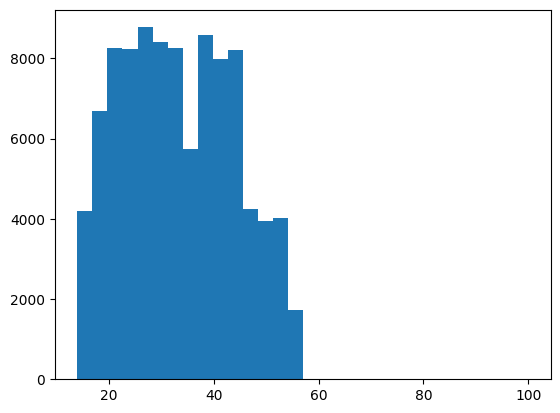

In [166]:
df['Age'] = df['Age'].apply(lambda x: x.replace('_','')).astype(int)                            
df = df.query("Age >= 0 and Age <= 100")
plt.hist(df['Age'], bins=30);

### Occupation
посмотрим на все уникальные значения и при необходимости заменим на Unknown

In [167]:
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [168]:
# колиечство пользоватлелей для определенной доменной области
df['Occupation'] = df['Occupation'].apply(lambda x: x.replace('_______', 'Unknown'))
df['Occupation'].value_counts()

Occupation
Unknown          6873
Lawyer           6389
Architect        6175
Engineer         6172
Scientist        6113
Accountant       6110
Mechanic         6099
Media_Manager    6068
Teacher          6049
Developer        6031
Entrepreneur     6015
Doctor           5916
Journalist       5906
Manager          5807
Musician         5760
Writer           5741
Name: count, dtype: int64

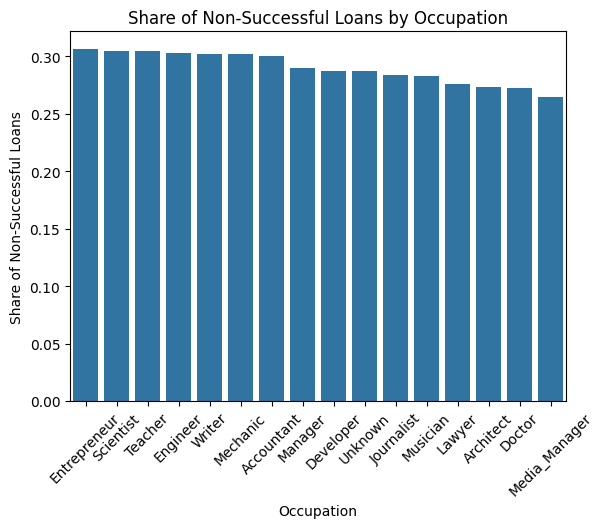

In [169]:
def seperated(x):
    if x == 'good':
        return 1
    if x == 'Poor':
        return 0
    else:
        return 2

df['Credit_Score_show'] = df['Credit_Score'].apply(lambda x: seperated(x))
non_successful_loans = df.groupby('Occupation')['Credit_Score_show'].apply(lambda x: (x == 0).mean())\
    .sort_values(ascending=False)

sns.barplot(x=non_successful_loans.index, y=non_successful_loans.values)
plt.xlabel('Occupation')
plt.ylabel('Share of Non-Successful Loans')
plt.title('Share of Non-Successful Loans by Occupation')
plt.xticks(rotation=45)
plt.show()

df.drop(columns=['Credit_Score_show'], inplace=True)

Можно заметить, что доля неудачных кредитов у <code>предпринимателей</code> больше всего. 

<Axes: xlabel='Count', ylabel='Occupation'>

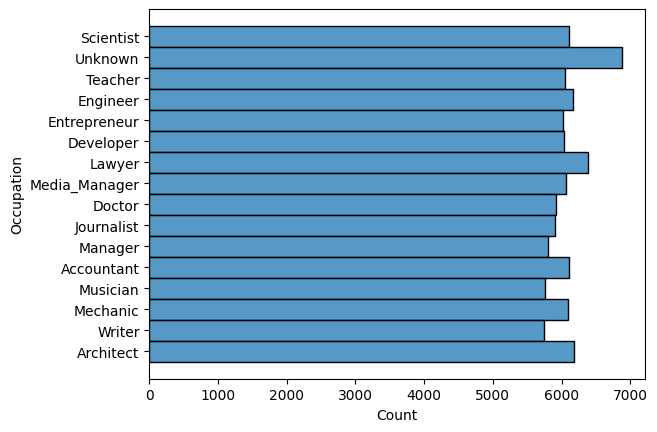

In [170]:
# посмотрим на долю пользователей из разных доменных областей
sns.histplot(df, y='Occupation')

Больше всего пользователей из неопределенной области <code>Unknown</code>

### Annual_Income
приведем к числовому состоянию данные

In [171]:
# приведем к числовому состоянию данные
df['Annual_Income'] = df['Annual_Income'].apply(lambda x: x.replace('-','').replace('_','')).astype(float)

### Monthly_Inhand_Salary
Заполним все пустые значения для Monthly_Inhand_Salary соответствующим <code>value = Annual_Income / 12</code>

In [172]:
df["Monthly_Inhand_Salary"] = df["Monthly_Inhand_Salary"].fillna(df["Annual_Income"]/12)

### Monthly_Balance
Заполним все nan-ы 0 и приведем к числовому виду.

In [173]:
df["Monthly_Balance"] = df["Monthly_Balance"].apply(lambda x: str(x))
df['Monthly_Balance'].replace('nan', '0', inplace=True)
df['Monthly_Balance'].replace('__-333333333333333333333333333__', '0', inplace=True)
df["Monthly_Balance"] = df["Monthly_Balance"].astype(np.float16)

### Changed_Credit_Limit
Преобразуем все данные, которые содержат "-" и "_".  

In [174]:
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].str.replace("_" , "").str.replace("-" , "")
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

### Changed_Credit_Limit
Преобразуем все данные и приведем к числовому виду.

In [175]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace("_" , "").str.replace("-100" , "0").astype(np.int16)

### Payment_of_Min_Amount
Преобразуем данные из 'No' в 'NM'.

In [176]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].apply(lambda x : 'No' if x == 'NM' else x)

### Num_of_Delayed_Payment
Заполняем все данные и приведем к числовому виду.

In [177]:
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].str.replace("_" , "").str.replace("-","").replace(np.nan,'0').astype(np.int16)

### Payment_Behaviour
Заполняем все "!@9#%8" значениями nan.

In [178]:
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("!@9#%8", np.nan)

### Credit_Mix
заменим пропуски на Unknown

In [179]:
df["Credit_Mix"].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [180]:
df["Credit_Mix"] = df["Credit_Mix"].str.replace("_" , "Unknown")

### Outstanding_Debt
Обработаем параметр, который указывает сумму непогашенного долга.

In [181]:
df["Outstanding_Debt"].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [182]:
df["Outstanding_Debt"] = df["Outstanding_Debt"].str.replace("_" , "").astype(np.float16)

### Credit_History_Age
Переведем историю пользователя в числовой параметер (месяцы)

In [183]:
df['Credit_History_Age']

0         22 Years and 1 Months
1                           NaN
3         22 Years and 4 Months
4         22 Years and 5 Months
5         22 Years and 6 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 97224, dtype: object

In [184]:
def parse_years_and_months_to_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0 
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0' 
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0  
    
df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(parse_years_and_months_to_months)
df.drop(columns=['Credit_History_Age'], inplace=True)

### Amount_invested_monthly
Преобразуем __ 10000 __, np.nan


In [185]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('__10000__', np.nan)
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype(float)

### Credit_Score
Создадим bar-plot для целевой переменной

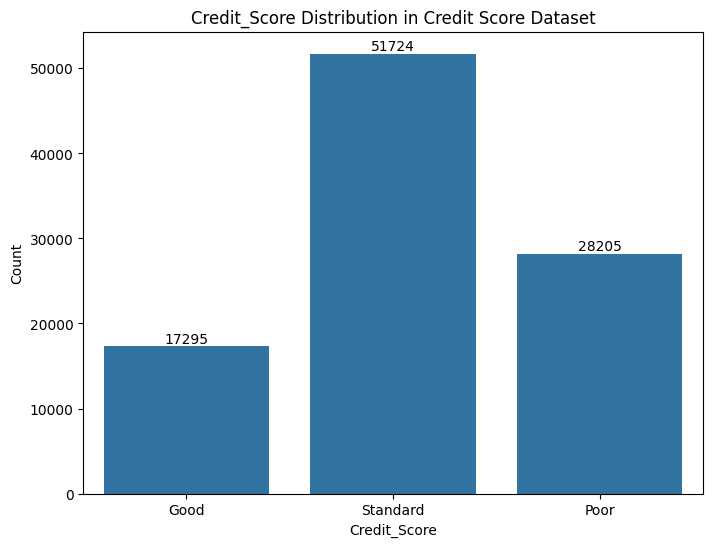

In [186]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(data=df, x='Credit_Score')
ax.bar_label(ax.containers[0])
plt.title('Credit_Score Distribution in Credit Score Dataset')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

Прослеживается дисбаланс классов целевого параметра. 

### Сохраним df

In [188]:
df = df.drop(columns=["ID", "Name", "SSN", "Type_of_Loan"])
df.to_csv('data/prep_data.csv', index=False)